# Customer Segmentation by Kmeans Clustering

- Ref: 1030
- The main objective of clustering is identify the pattern/ cluster

# Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for Elbow visualization
import seaborn as sns   # Count Visualization
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)      # Global application, no need to use random state for each application explicitely

# Load Data

In [2]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# EDA

In [3]:
df = data.copy()  # Its can be good practice to make a copy for future reference

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


#### Findings:

- "Object/ Texual" datatype found in Gender columns, so that can be treated e.g "Type Converstion/ correction" to int

# Type Correction or Converstion or Categorical Encoding

## A. General Method

- Categorical Encoding/ Feature Encoding/ Type Conversion/ Label Encoding

In [5]:
df.Gender.astype('category')   # This will be converted into catagory, but actually not be updated here

CustomerID
1        Male
2        Male
3      Female
4      Female
5      Female
        ...  
196    Female
197    Female
198      Male
199      Male
200      Male
Name: Gender, Length: 200, dtype: category
Categories (2, object): ['Female', 'Male']

In [6]:
df.Gender.astype('category').cat.codes              # cat: Category; codes: category codes, 1: male, 0:Female 

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
196    0
197    0
198    1
199    1
200    1
Length: 200, dtype: int8

### Assign categories values

In [7]:
df.Gender = df.Gender.astype('category').cat.codes           # Gender Converted, this can used for any ML
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


- cat.codes: When limited/two values in object col
- Label/One hot encoding:  when multiple values in object(Gender) column
- cat.codes: assigned encoding values as per alphabatic order

## B. Encoding Method

In [8]:
# Original Data
df1 = data
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder # Module
encoder = LabelEncoder()                       # Create an encoder
encoder.fit_transform(df1.Gender)              # Fit/ Transform/ train the data by created encoder, see the output return 1 & 0

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [10]:
# Storingt the values
df1.Gender = encoder.fit_transform(df1.Gender) # Storing the values in Gender Columns
df1.head()                                     # Dataframe updated by encoded values

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


### Inverse Transform / Decode

In [11]:
df1.Gender.values      # converting values that means numpy array

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

- When you dont know about 0,1... n then inverse will 'help' to understand

In [12]:
encoder.inverse_transform(df1.Gender.values)

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


# Distribution Review

- Since we hava a categorical col as Gender, we can see its distribution
- For statistical distribution, barplot is best choice
- For customization matplotlib can be useful, but generally sns is preferred

In [13]:
gender = df.Gender.value_counts()
gender                  # 0: Female  ;   1: Male

0    112
1     88
Name: Gender, dtype: int64

In [14]:
gender = df.Gender.value_counts()
gender.values

array([112,  88], dtype=int64)

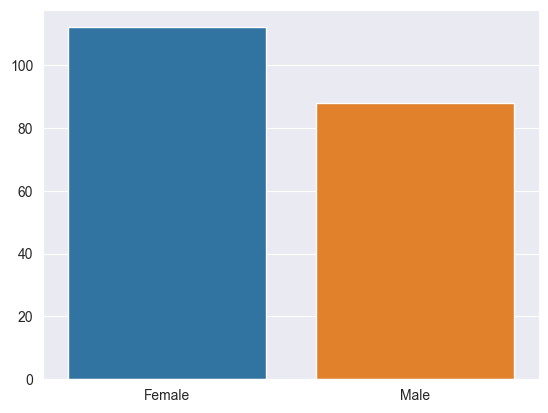

In [15]:
# x & y declaired explicitely
sns.set_style('darkgrid')
sns.barplot(x=["Female","Male"], y=gender.values)   # Barplot requires x & y,     x got multiple values in list/array
plt.show()

In [16]:
df.Gender.values

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int8)

In [17]:
# encoder.inverse_transform(df.Gender.values)
inverse_val = encoder.inverse_transform(df.Gender.values)
inverse_val

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


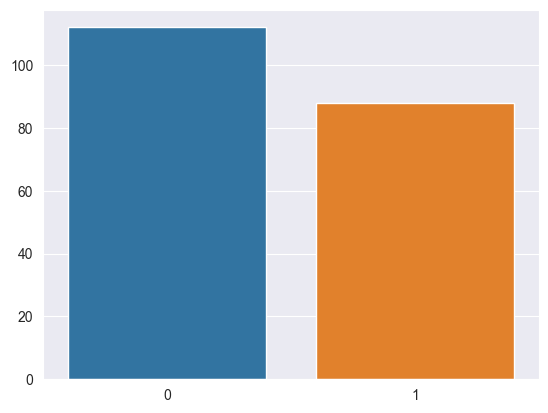

In [18]:
sns.set_style('darkgrid')
sns.barplot(x=encoder.fit_transform(gender.index), y=gender.values) # x auto passing
plt.show()

- Now we will try to understand the underlysing pattern by scatter plot, so that we can understand the pattern properly

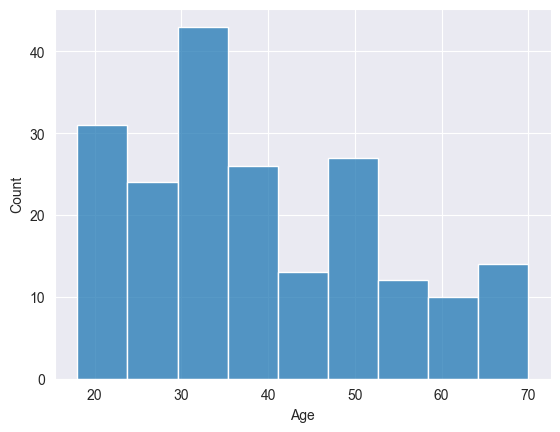

In [19]:
# Inspecting Age
sns.histplot(data=df1, x='Age')  # histplot for continues value
plt.show()

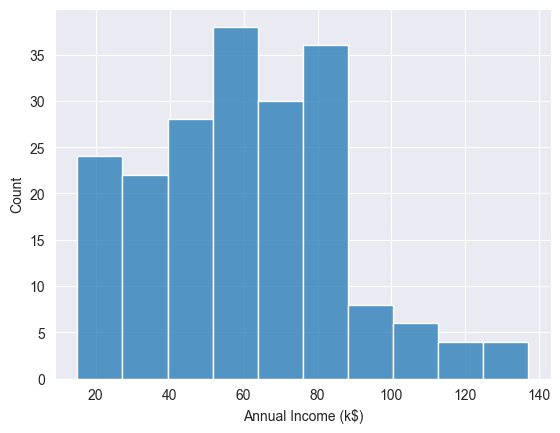

In [20]:
sns.histplot(x='Annual Income (k$)', data=df1)
plt.show()

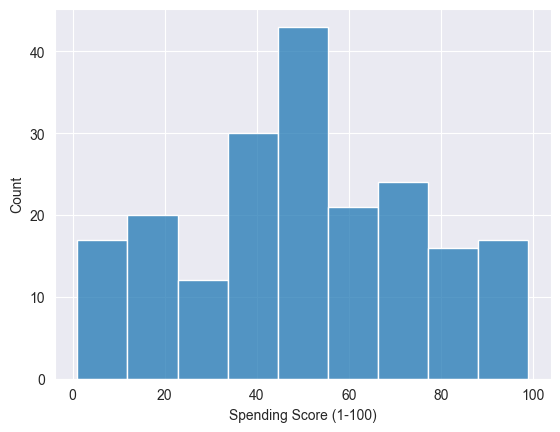

In [21]:
sns.histplot(data=df1, x='Spending Score (1-100)')
plt.show()

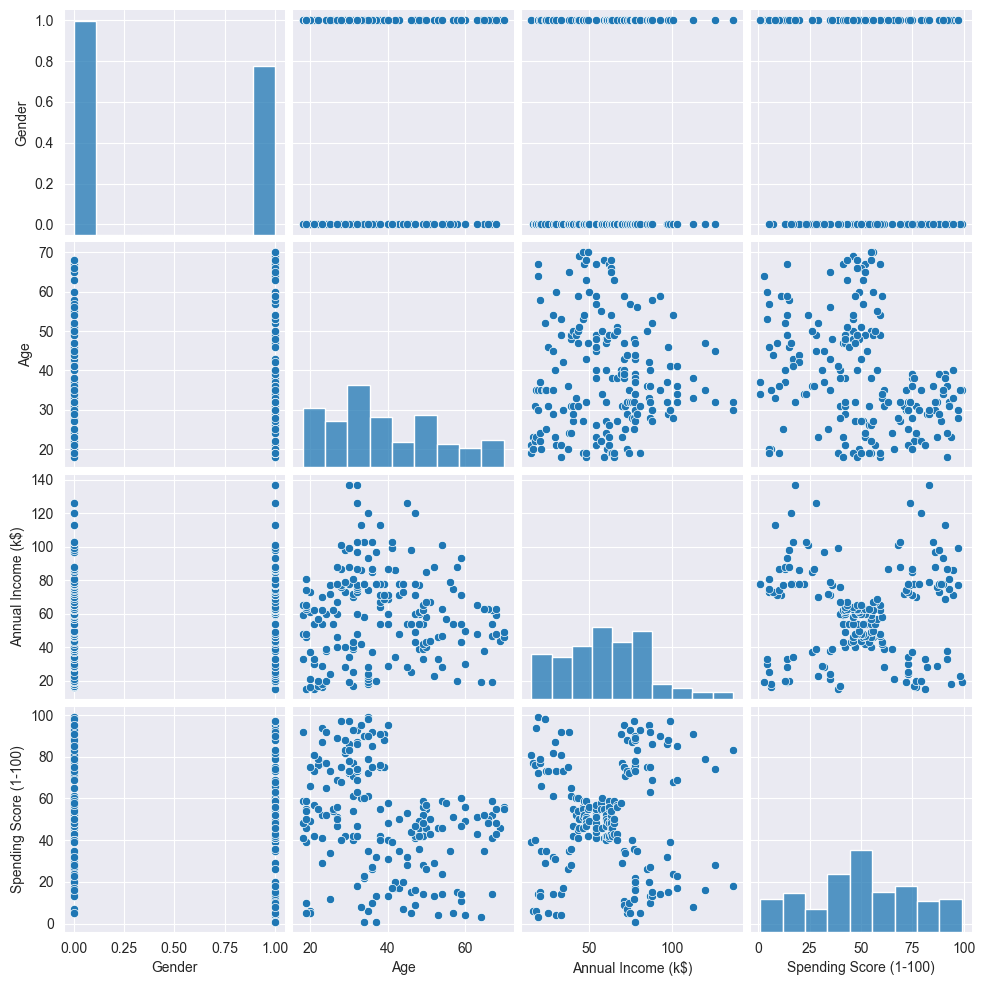

In [22]:
sns.pairplot(data=df1)  # Return distribution as well as its internal relationship, do all at a time
plt.show()

### Insights

- As per graph, there is a pattern in between 'Spending score' vs 'Annual score'
- There are some outliers(Spending Score & Annual Income), lets try to remove the outliers first
- We will take two (Spending & Income), because we can see clearly there is a obvious pattern between this- its 'Feature Selection'
- In reallife, take one by one & try to categories this. Do Clustering for one only, not two, after clustering see the silhoutte score, then sorting, then select best scores like top 2, 3..n
- As per pairplot, its obvious that, whole data is not scaled, rathers its spread in different range, so need to scaled first to make sure the data in "Standard Distribution"

# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df1)

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

- StandardScaler is one the most popular scaler, which is very efficient for standard distribution
- Scaling applied on numerical data, e.g here 4 features
- No need to scale the any categorical data

In [24]:
# Remove Categorical data & scored it
scaled = scaler.fit_transform(df1.drop(columns=['Gender'])) 
scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

#### Numpy Slicing for target features

In [25]:
# Since its numpy object, it will boardcast(assign each col to each col) automaticaly
df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaled
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,-1.424569,-1.738999,-0.434801
2,1,-1.281035,-1.738999,1.195704
3,0,-1.352802,-1.700830,-1.715913
4,0,-1.137502,-1.700830,1.040418
5,0,-0.563369,-1.662660,-0.395980


- Boardcast: There scaled data, will board cast to respective three columns automatically
- Scaled: Thats mean, both side of mean, now data are equally distributed / Standard Distribution

# Clustering

In [30]:
# Model Initialization / Prepare Model

from sklearn.cluster import KMeans
cluster = KMeans()                     # defualt k=8
cluster.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])                          # Does not required train test, because lable is unkown

KMeans()

In [31]:
# Cluster Default Center values
cluster.cluster_centers_

array([[-0.49242034,  0.05487957],
       [ 1.87564575, -1.09476801],
       [ 1.87564575,  1.23452563],
       [ 0.7489536 , -1.45651437],
       [-1.32954532, -1.16358805],
       [-1.35366972,  1.15873115],
       [ 0.12948524, -0.15473165],
       [ 0.68673384,  1.241219  ]])

- First pair is center of cluster 1
- 2nd pair is center of cluster 2 & last one is center of cluster 8 (default)
- First column is value "Annual Income" & 2nd Columns is value of "Spending Score"

- In kmeans clustering, train test not needed, becasue label is unknown, lets say you have been assiged to to a math, but which solution is uknown, so how can be test or trained
- But, its requires validation, to justify how meaningful the result. Silhouttee score is preferable validation technique

### Ref

- https://ai-ml-analytics.com/encoding/
- 24.38